# Sentiment analysis of daraz reviews using Neural Networks

In [ ]:
# Import the necessary libraries

import re
import pandas as pd
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import spacy

In [ ]:
# Download labeled csv file from google drive
!gdown --id 1h3mRepSN8J8okQZUw9MBe5D9YIY8bHk0

Downloading...
From: https://drive.google.com/uc?id=1h3mRepSN8J8okQZUw9MBe5D9YIY8bHk0
To: /content/Data_after_Labeling.csv
100% 361k/361k [00:00<00:00, 59.2MB/s]


In [ ]:
# Let's read our csv file

df=pd.read_csv('/content/Data_after_Labeling.csv', sep=',')
df.head()    # read first few rows

,Reviews,Labels
0,The vegetables were well packed 😍 and price i...,1
1,good quality!!! nice packaging ... good taste....,1
2,Fresh cauliflower delivered in the main bag wi...,1
3,Gobi was really nice💯% and clean. But there wa...,1
4,Good n fresh as always,1


In [ ]:
for index in range(len(df['Reviews'].values)):
  if type(df['Reviews'][index]) is not str:
    print(index)

# print index of empty/not string row

## Data pre-processing/cleaning steps

1. Make text lowercase
2. Remove punctuation
3. Remove emoji’s
4. Remove stopwords
5. Lemmatization

### 1. Make text lowercase

In [ ]:
def preprocess_review(review):

In [ ]:
# Creating a new column named 'updated_reviews' and transform all reviews to lowercase 

df['Updated_reviews'] = df['Reviews'].str.lower()
df['Updated_reviews'].head()

0    the vegetables were well packed  😍 and price i...
1    good quality!!! nice packaging ... good taste....
2    fresh cauliflower delivered in the main bag wi...
3    gobi was really nice💯% and clean. but there wa...
4                               good n fresh as always
Name: Updated_reviews, dtype: object

### 2. Remove punctuation

In [ ]:
# Remove punctuations

df['Updated_reviews'] = df['Updated_reviews'].str.replace('[^\w\s]','')
df['Updated_reviews'].head()

0    the vegetables were well packed   and price is...
1    good quality nice packaging  good taste keep i...
2    fresh cauliflower delivered in the main bag wi...
3    gobi was really nice and clean but there was t...
4                               good n fresh as always
Name: Updated_reviews, dtype: object

### 3. Remove emoji’s

In [ ]:
#  Remove emoji if present
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags 
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

# no need as such, because emojis are removed already above in 'Remove punctuations' part

In [ ]:
df['Updated_reviews'] = df['Updated_reviews'].apply(lambda x: remove_emoji(x))
df.head()

,Reviews,Labels,Updated_reviews
0,The vegetables were well packed 😍 and price i...,1,the vegetables were well packed and price is...
1,good quality!!! nice packaging ... good taste....,1,good quality nice packaging good taste keep i...
2,Fresh cauliflower delivered in the main bag wi...,1,fresh cauliflower delivered in the main bag wi...
3,Gobi was really nice💯% and clean. But there wa...,1,gobi was really nice and clean but there was t...
4,Good n fresh as always,1,good n fresh as always


### 4. Remove stopwords

In [ ]:
# download package stopwords

import nltk
nltk.download('stopwords')
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Remove stop words

df['Updated_reviews'] = df['Updated_reviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df.head()

,Reviews,Labels,Updated_reviews
0,The vegetables were well packed 😍 and price i...,1,vegetables well packed price also reasonable g...
1,good quality!!! nice packaging ... good taste....,1,good quality nice packaging good taste keep draz
2,Fresh cauliflower delivered in the main bag wi...,1,fresh cauliflower delivered main bag without w...
3,Gobi was really nice💯% and clean. But there wa...,1,gobi really nice clean much stalk left useable...
4,Good n fresh as always,1,good n fresh always


### 5. Lemmatization

In [ ]:
# initialize Spacy ‘en’ model, keeping only the component need for lemmatization and creating an engine

nlp = spacy.load('en', disable=['parser', 'ner'])

In [ ]:
# Lemmatization using Spacy

def space(comment):
    doc = nlp(comment)
    return " ".join([token.lemma_ for token in doc])
df['Updated_reviews']= df['Updated_reviews'].apply(space)
df.head(20)

,Reviews,Labels,Updated_reviews
0,The vegetables were well packed 😍 and price i...,1,vegetable well pack price also reasonable good...
1,good quality!!! nice packaging ... good taste....,1,good quality nice package good taste keep draz
2,Fresh cauliflower delivered in the main bag wi...,1,fresh cauliflower deliver main bag without wra...
3,Gobi was really nice💯% and clean. But there wa...,1,gobi really nice clean much stalk leave useabl...
4,Good n fresh as always,1,good n fresh always
5,Vegetable received in good condition.\nEach st...,1,vegetable receive good condition stuff well pa...
6,The cabbage were not very fresh but dFresh sen...,0,cabbage fresh dfresh send almost 2 kg instead ...
7,cauliflower was fresh and cheap. there was no ...,1,cauliflower fresh cheap default love order dfr...
8,The vegetable did not appear very fresh but wa...,1,vegetable appear fresh be not spoil either
9,Fresh vegetables.\nOn time delivered.\nReasona...,1,fresh vegetable time deliver reasonable price


In [ ]:
# Exporting data from google colab and then download data

from google.colab import files
df.to_csv('Data_after_Cleaning.csv') 
files.download('Data_after_Cleaning.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Data transformation

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vec = CountVectorizer(max_features = 1420)

In [ ]:
# Converting cleaned dataset into bag of words

X = count_vec.fit_transform(df['Updated_reviews']).toarray()
y = df.iloc[:, -2].values
X, y

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 1, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]), array([1, 1, 1, ..., 1, 1, 1]))

## Splitting data into training and testing sets

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0) # 80% training, 20% testing

## Model building (Neural network)

In [ ]:
import tensorflow as tf

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model, this time 3 layers
nn_model = tf.keras.Sequential([
 tf.keras.layers.Dense(100, activation="relu"),
 tf.keras.layers.Dense(10, activation="relu"),
 tf.keras.layers.Dense(1, activation="sigmoid")                              
])

# 2. Compile the model
nn_model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),      # This time our faithful, Adam
                 metrics = ['accuracy'])

# 3. Fit the model
nn_history = nn_model.fit(X_train,
                          y_train,
                          epochs=10,
                          validation_data = (X_test, y_test),
                          verbose=1)

Epoch 1/10
117/117 [==============================] - 2s 6ms/step - loss: 0.4046 - accuracy: 0.8783 - val_loss: 0.1663 - val_accuracy: 0.9483
Epoch 2/10
117/117 [==============================] - 1s 4ms/step - loss: 0.1359 - accuracy: 0.9561 - val_loss: 0.1185 - val_accuracy: 0.9602
Epoch 3/10
117/117 [==============================] - 1s 5ms/step - loss: 0.0976 - accuracy: 0.9701 - val_loss: 0.1189 - val_accuracy: 0.9602
Epoch 4/10
117/117 [==============================] - 0s 4ms/step - loss: 0.0797 - accuracy: 0.9771 - val_loss: 0.1244 - val_accuracy: 0.9591
Epoch 5/10
117/117 [==============================] - 0s 4ms/step - loss: 0.0689 - accuracy: 0.9787 - val_loss: 0.1280 - val_accuracy: 0.9580
Epoch 6/10
117/117 [==============================] - 0s 4ms/step - loss: 0.0608 - accuracy: 0.9801 - val_loss: 0.1358 - val_accuracy: 0.9559
Epoch 7/10
117/117 [==============================] - 1s 4ms/step - loss: 0.0537 - accuracy: 0.9828 - val_loss: 0.1393 - val_accuracy: 0.9591
Epoch 

## Model's performance
Accuracy on test/unseen data

In [ ]:
nn_model.evaluate(X_test, y_test)

30/30 [==============================] - 0s 3ms/step - loss: 0.1590 - accuracy: 0.9559


[0.1589636206626892, 0.9558665156364441]

## Visualize model's performance in form of curves

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history["loss"]
  validation_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  validation_accuracy = history.history["val_accuracy"]

  # how many epochs did we run for?
  epochs = range(len(history.history["loss"]))
  
  # Plot loss
  plt.figure(figsize=(17, 7))
  plt.subplot(1, 2, 1)
  plt.plot(epochs, loss, label="Training loss")
  plt.plot(epochs, validation_loss, label="Validation loss")
  plt.title("loss (training and testing)")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.subplot(1, 2, 2)
  plt.plot(epochs, accuracy, label="Training accuracy")
  plt.plot(epochs, validation_accuracy, label="Validation accuracy")
  plt.title("accuracy (training and testing)")
  plt.xlabel("epochs")
  plt.legend()

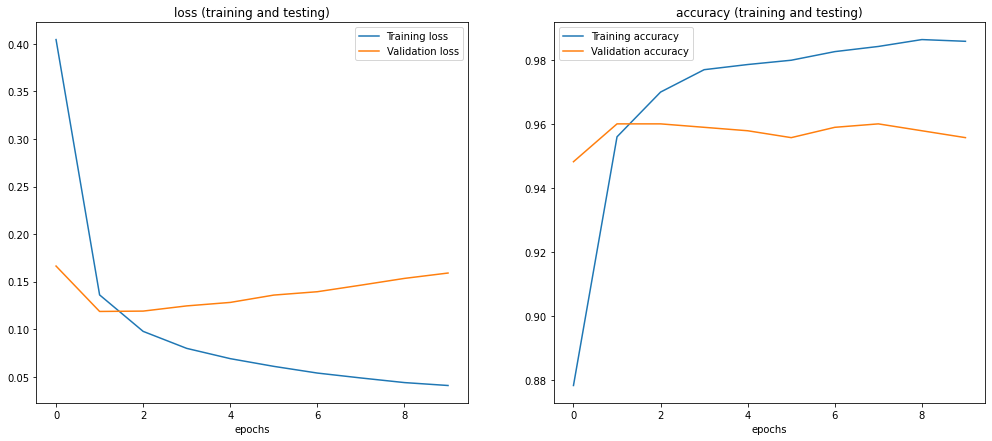

In [ ]:
plot_loss_curves(history=nn_history)

## Predictions on test data

In [ ]:
y_preds = nn_model.predict(X_test)
tf.round(y_preds)

<tf.Tensor: shape=(929, 1), dtype=float32, numpy=
array([[0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
 

In [ ]:
from gensim.parsing.preprocessing import remove_stopwords

sentence = "I loved the product but don't buy it, it has problems."
sentence = sentence.lower()
sentence = re.sub(r'[^\w\s]', '', sentence)
sentence = remove_stopwords(sentence)
sentence
#sentence.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
#sentence.apply(space)
x = count_vec.fit_transform([sentence])
print(x)
#y_pred = nn_model.predict(x)
#tf.round(y_pred)

  (0, 2)	1
  (0, 4)	1
  (0, 1)	1
  (0, 0)	1
  (0, 3)	1


## Confusion Matrix

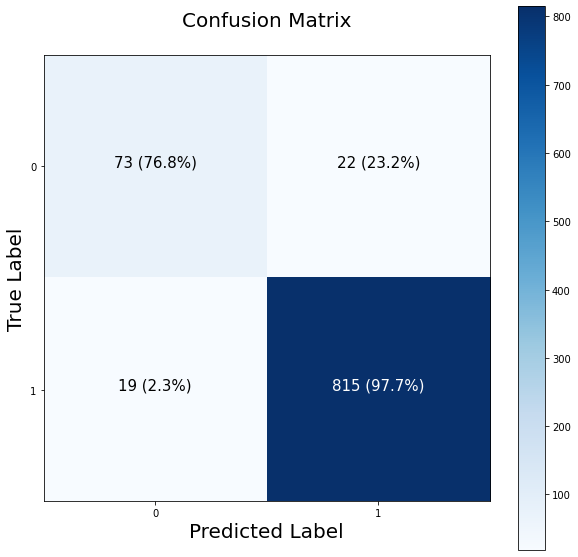

In [ ]:
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted Label",
       ylabel="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels, 
       yticklabels=labels)
# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

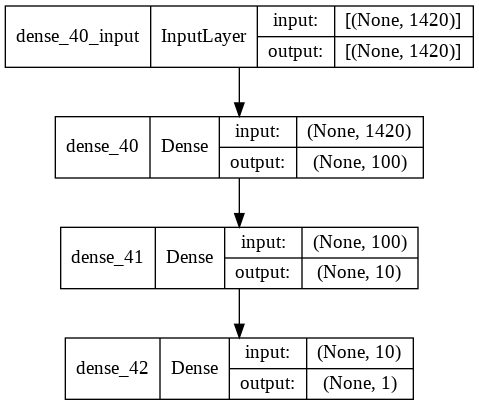

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(nn_model,show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True)